Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **19Mar2019**, Austin T. Rotker **Aug2019**

# 05. Two-Temperature Boiling Water Reactor Example B
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Problem Statement](#ps)
* [Reactor Starup And Steady State](#res1)
* [Condenser Malfunction Results](#res2)
* [Reactor Shutdown Results](#res3)

---

## Objectives<a id="obj"></a>
+ Use one-group energy, two-temperature, point-reactor dynamics modeling (six-group delayed neutron emitters) to obtain insight on neutron density behavior with time-dependent reactivity of a Boiling Water Reactor during startup, steady state operation, shutdown and condenser malfunctions.
+ Explore and understand intrinsic temperature reactivity coefficient feedback from nuclear sources.

## Introduction<a id="intro"></a>

In-class course notes OneNote [ChEn-4350-feedback](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Eo9JUns42F1Pqmq4tFS9sJsBv2jF8UDQvRb5l5Z2D5ssag?e=FDeSpV).

Refer to Notebook 03.


## Problem Statement<a id="ps"></a>

Consider a high temperature gas cooled reactor, with UO$_2$ fuel and a graphite moderator.
Given the neutron generation time $\ell$, delayed neutron fraction, $\beta$, decay constants of a six-group delayed neutron emitters, $\lambda_i$, and corresponding yield of delayed neutron fractions for each emitter, $\beta_i$, calculate the pointwise neutron density variation with time for **varying** neutron reactivity, $\rho(t)$.

![](images/point-reactor-hx.png)

The below functions are used to import the functions written in 05-bwr-two-temperature-pt-reactor-A for the sake of simplicity. They are taken from https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Importing%20Notebooks.html.

In [1]:
!pip install iapws
import numpy as np



You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [3]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [4]:
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            for cell in nb.cells:
                if cell.cell_type == 'code':
                    # transform the input to executable Python
                    code = self.shell.input_transformer_manager.transform_cell(cell.source)
                    # run the code in themodule
                    exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod


In [5]:
loader = NotebookLoader()
reactor = loader.load_module("05-bwr-two-temperature-pt-reactor-A")


importing Jupyter notebook from 05-bwr-two-temperature-pt-reactor-A.ipynb
You should consider upgrading via the 'pip install --upgrade pip' command.
done


## Reactor Startup: Reactivity Step with Pulsed Source<a id="res1"></a>

Neutronless reactor before time zero. At time zero, apply a pulsed source and a reactivity step. Followed by some time at steady state operation.

In [6]:
'''Setup up initial conditions'''

import numpy as np

reactor.params['malfunction start'] = 1300
reactor.params['malfunction end'] = 0
reactor.params['breakage start'] = 1300
reactor.params['breakage end'] = 0
reactor.params['shutdown time'] = 1300

reactor.gen_time = reactor.params['gen_time'] # retrieve neutron generation time
reactor.params['q_0'] = 1

reactor.params['n_ss'] = 0 # neutronless steady state before start up

reactor.rho_0_over_beta = 0.25 # $

reactor.beta = reactor.params['beta'] # retrieve the delayed neutron fraction
reactor.params['reactivity'] = reactor.rho_0_over_beta * reactor.beta # "rho/beta = 10 cents"

reactor.params['temp_0'] = reactor.params['temp_o']

reactor.params['tau_fake'] = 2 # s

# setup remaining initial conditions
reactor.setup_initial_conditions(reactor.params)

In [7]:
'''Evolve the point-reactor'''

time_final    = 1200# 450 # s
n_time_stamps = 500 # number of solution values in time

reactor.params['time_final']    = time_final
reactor.params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
reactor.u_vec_history = reactor.run_point_reactor( reactor.f_vec, reactor.params )
#print(u_vec_history)
print("done")

done


In [8]:
#plot the q3prime and heat removed data
heat_data1 = reactor.quantities1(reactor.u_vec_history, reactor.params, reactor.params['time_stamps'])
plot = heat_data1.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)
plot.set_xlabel("Time(s) (Tau = 2s)")
plot.set_ylabel("energy (gW/m3)")
plot.set_title("Heat Removed and Q''' vs time during reactor startup")


Text(0.5, 1.0, "Heat Removed and Q''' vs time during reactor startup")

Q''' and heat removed increase fairly quickly before reaching steady state in about 5-10 minutes. There is an initial spike in and then loss of heat removed as the neutron source is inserted and then quickly removed from the system, with heat removed staying mostly constant over this period of time.

Text(0.5, 1.0, 'Turbine, Condenser and Net Power vs Time for reactor startup')

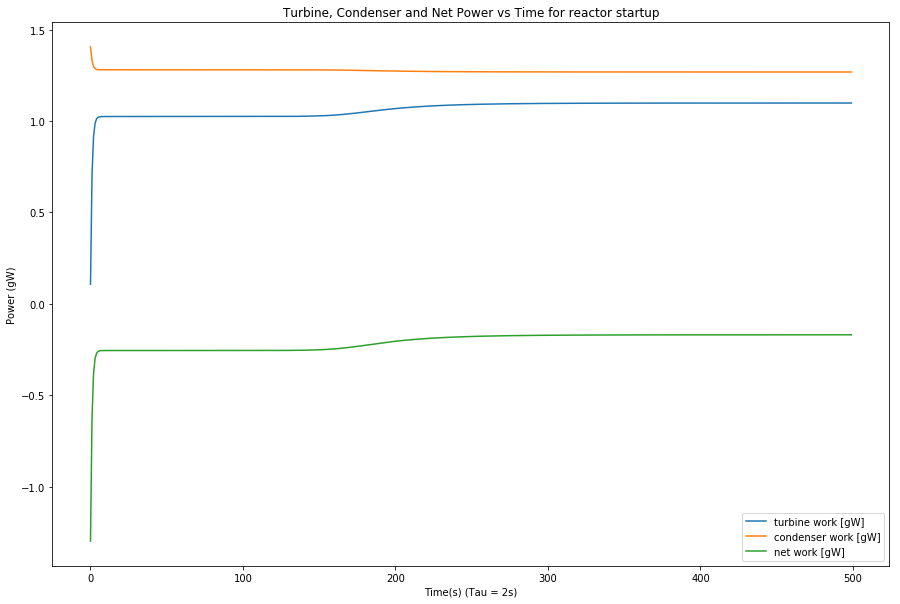

In [9]:
# plot the BOP work done
work_data1 = reactor.quantities2(reactor.u_vec_history, reactor.params, reactor.params['time_stamps'])
plot = work_data1.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)
plot.set_xlabel("Time(s) (Tau = 2s)")
plot.set_ylabel("Power (gW)")
plot.set_title("Turbine, Condenser and Net Power vs Time for reactor startup")

Turbine work jumps heavily with the initial temperature ramp up in the reactor, with condenser work initially spiking and then decreasing following the effects of the initial neutron source.

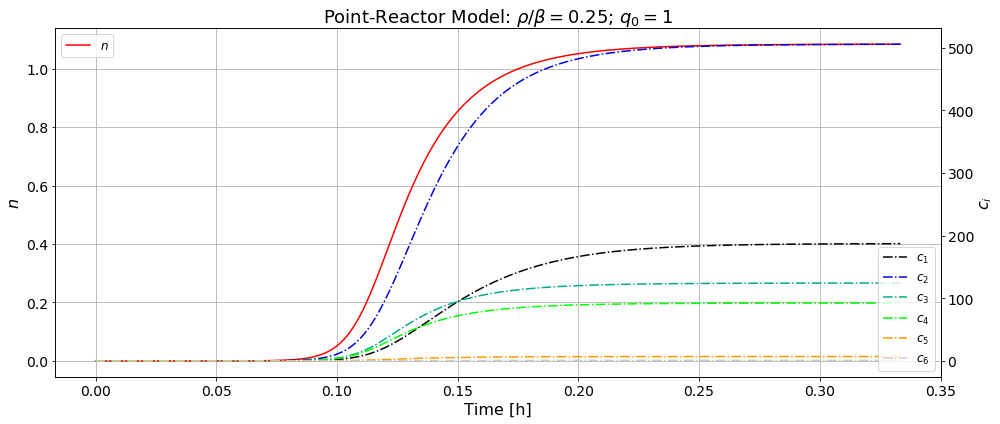

In [10]:
reactor.plot_results(reactor.u_vec_history, normalize=False)

Neutron density follows the predicted S shape pattern, with initial quick growth followed by a roundoff to the steady state neutron density.

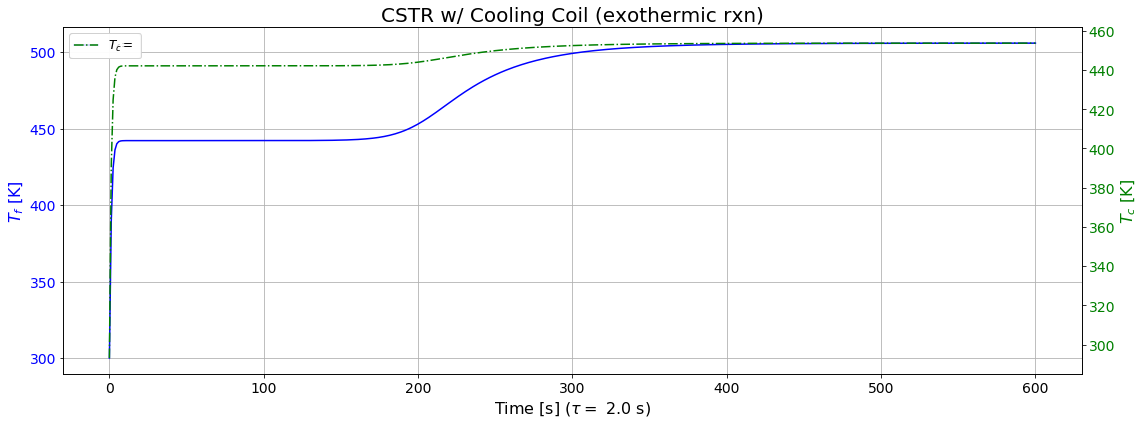

In [11]:
reactor.tmp()

Coolant and fuel temperatures spike heavily initially with the insertion and then removal of the initial neutron source. Two horizontal asymptotes can be observed in the temperature graphs. They can be explained as follows: after the initial neutron source insertion and removal, the two temperatures of the reactor go to an initial steady state condition where they are are seperated by approximately 50 K in temperature, with Q''' and heat removed being quite low as neutron density fails to increase. As neutron density begins to ramp up, so to do Q''', heat removed, and the temperatures of both the fuel and the coolant. This begins at around 400 seconds and continues until the reactor reaches steady state neutron density at around 800 seconds, closely mirroring the neutron density in this second region.

<a id="res2"></a>
# Steady State Reactor Startup Followed By Condenser Malfunction
The reactor is started up as normal, and some time is allowed to pass with the reactor functioning at steady state. After this time has passed, the condenser experiences a malfunction wherein the degree of subcooling of the liquid leaving the condenser is decreased for a period of time, leading to an increase in reactor operating temperatures.

In [12]:
'''Setup up initial conditions'''

import numpy as np

reactor.params['malfunction start'] = 1300 # malfunction starts at 1300 seconds and ends at 2000 seconds
reactor.params['malfunction end'] = 2000
reactor.params['breakage start'] = 3001
reactor.params['breakage end'] = 0
reactor.params['malfunction subcooling'] = 1
reactor.params['shutdown time'] = 20000

reactor.gen_time = reactor.params['gen_time'] # retrieve neutron generation time
reactor.params['q_0'] = 1

reactor.params['n_ss'] = 0 # neutronless steady state before start up

reactor.rho_0_over_beta = 0.25 # $

reactor.beta = reactor.params['beta'] # retrieve the delayed neutron fraction
reactor.params['reactivity'] = reactor.rho_0_over_beta * reactor.beta # "rho/beta = 10 cents"

reactor.params['temp_0'] = reactor.params['temp_o']

reactor.params['tau_fake'] = 2 # s



# setup remaining initial conditions
reactor.setup_initial_conditions(reactor.params)

In [13]:
'''Evolve the point-reactor'''

time_final    = 3000# 450 # s
n_time_stamps = 1000 # number of solution values in time

reactor.params['time_final']    = time_final
reactor.params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
reactor.u_vec_history = reactor.run_point_reactor( reactor.f_vec, reactor.params )
#print(u_vec_history)
print("done")

done


Text(0.5, 1.0, "Heat Removed and Q''' vs time during condenser malfunction")

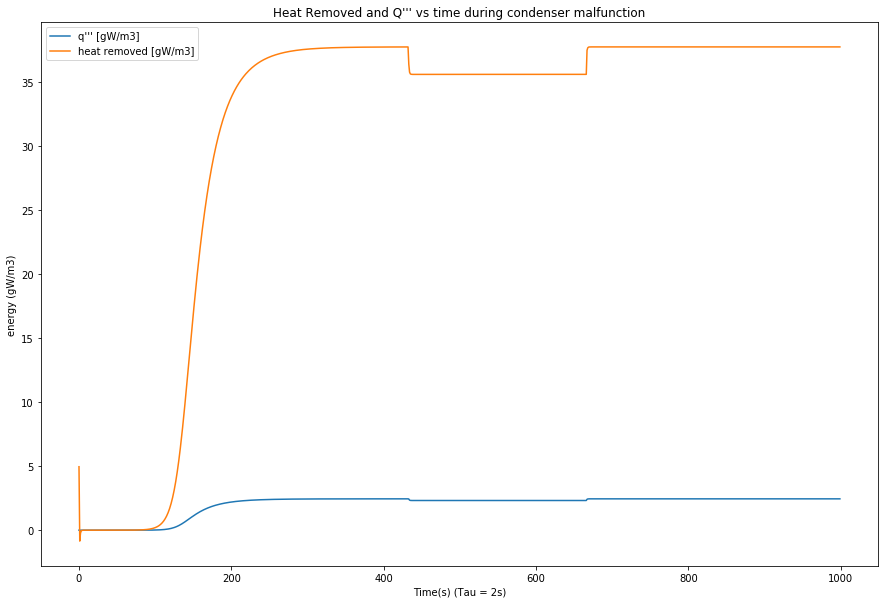

In [14]:
#plot the q3prime and heat removed data
heat_data2 = reactor.quantities1(reactor.u_vec_history, reactor.params, reactor.params['time_stamps'])
plot = heat_data2.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)
plot.set_xlabel("Time(s) (Tau = 2s)")
plot.set_ylabel("energy (gW/m3)")
plot.set_title("Heat Removed and Q''' vs time during condenser malfunction")


The condenser malfunction modeled here results in a decrease in the subcooling of the liquid leaving the condenser, resulting in higher inlet temperatures $T_\text{in}$. This higher inlet temperature reduces the heat removed from the system following newton's law of cooling, whereby the heat removed from the system is proportional to:

\begin{equation*}
T_\text{fuel} - T_\text{in}
\end{equation*}

With an increase in the second term causing a corresponding decrease in the heat removed from the system.

Text(0.5, 1.0, 'Turbine, Condenser and Net Power vs Time for condenser malfunction')

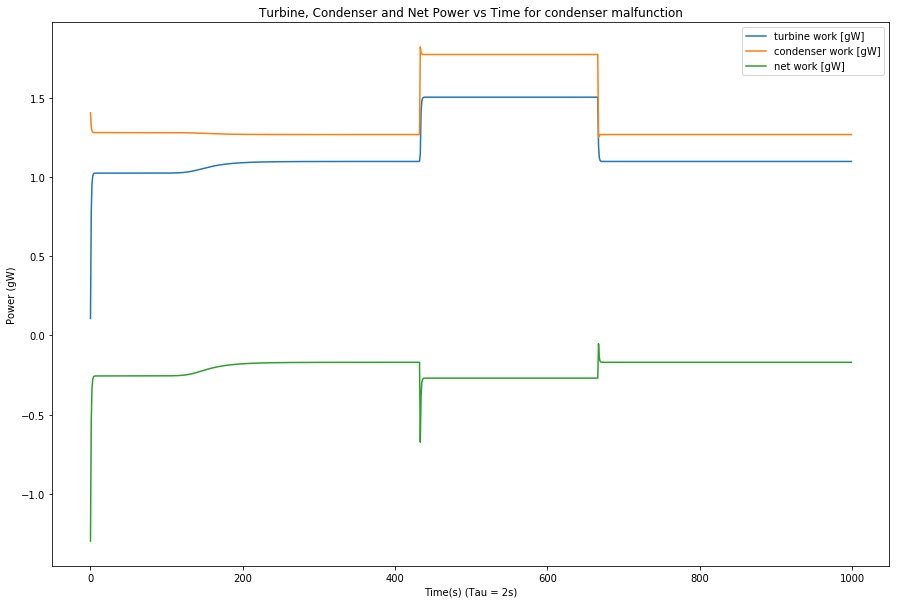

In [15]:
# plot the BOP work done
work_data2 = reactor.quantities2(reactor.u_vec_history, reactor.params, reactor.params['time_stamps'])
plot = work_data2.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)
plot.set_xlabel("Time(s) (Tau = 2s)")
plot.set_ylabel("Power (gW)")
plot.set_title("Turbine, Condenser and Net Power vs Time for condenser malfunction")

Loss of subcooling leads to a higher temperature in the reactor, both of the fuel and of the coolant as it leaves the reactor. As the coolant leaves at a higher temperature, it will have a higher ending enthalpy, and hence the turbine will be able to extract more work from it, which is reflected in the above graph. Additionally, a higher temperature in the reactor results in a higher reactor operating pressure, which means that more work must be done by the pump in the condenser to raise the subcooled liquid runoff from the condenser to the operating pressure of the reactor, resulting in an immediate jump in the work done by the condenser as well. 

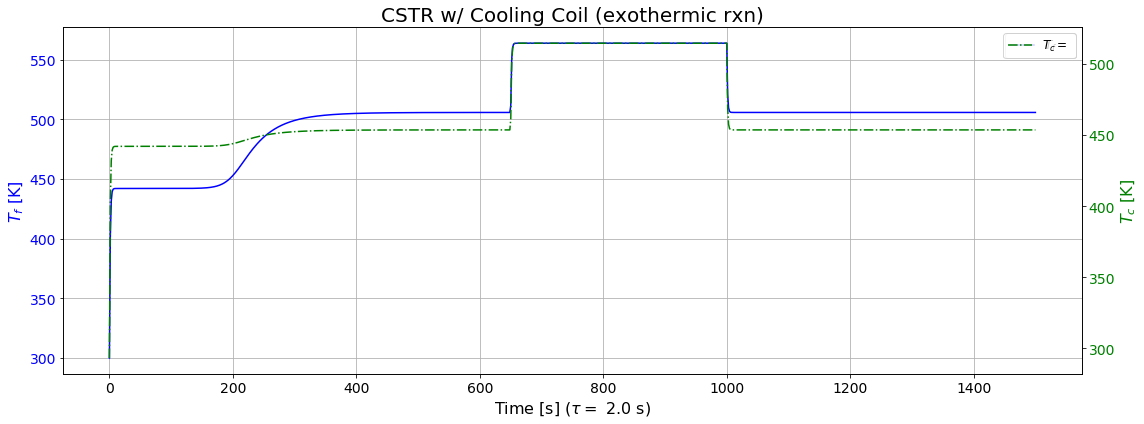

In [16]:
reactor.tmp()

During the condenser malfunction, the operating temperatures of the reactor increase to about 500 K for the coolant and 550 K for the fuel, before decreasing to normal operating levels after the end of the malfunction.

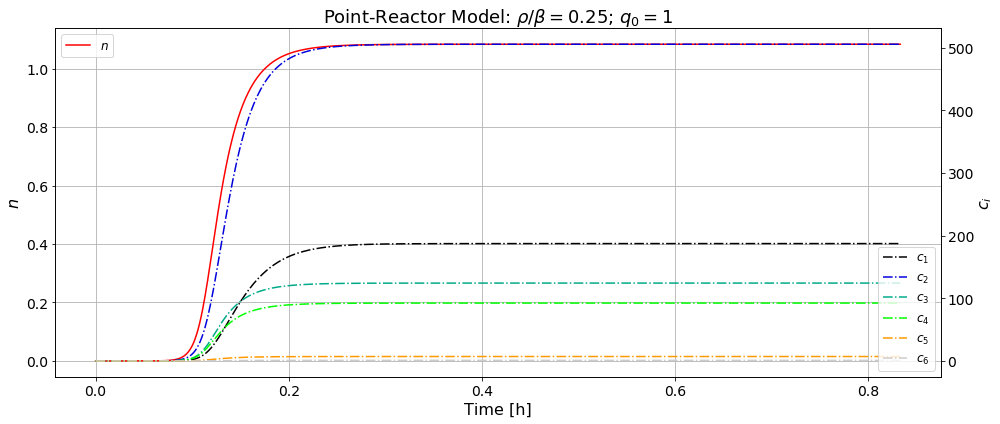

In [17]:
reactor.plot_results(reactor.u_vec_history, normalize=False)

Due to an extremely small temperature reactivity coefficient, there is no observable effect on the neutron density in the reactor during or after the condenser malfunction.

<a id="res3"></a>
# Shutdown
The reactor starts up as normal, operates for a certain period of time at steady state, and then shuts down to zero power.

In [18]:
'''Setup up initial conditions'''

import numpy as np

reactor.params['malfunction start'] = 13000 # malfunction starts at 1300 seconds and ends at 2000 seconds
reactor.params['malfunction end'] = 0
reactor.params['breakage start'] = 13000
reactor.params['breakage end'] = 0
reactor.params['shutdown time'] = 2000

reactor.gen_time = reactor.params['gen_time'] # retrieve neutron generation time
reactor.params['q_0'] = 1

reactor.params['n_ss'] = 0 # neutronless steady state before start up

reactor.rho_0_over_beta = 0.25 # $

reactor.beta = reactor.params['beta'] # retrieve the delayed neutron fraction
reactor.params['reactivity'] = reactor.rho_0_over_beta * reactor.beta # "rho/beta = 10 cents"

reactor.params['temp_0'] = reactor.params['temp_o']

reactor.params['tau_fake'] = 2 # s


# setup remaining initial conditions
reactor.setup_initial_conditions(reactor.params)

In [19]:
'''Evolve the point-reactor'''

time_final    = 12000 # 450 # s
n_time_stamps = 1000 # number of solution values in time

reactor.params['time_final']    = time_final
reactor.params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
reactor.u_vec_history = reactor.run_point_reactor( reactor.f_vec, reactor.params )
#print(u_vec_history)
print("done")

done


Text(0.5, 1.0, "Heat Removed and Q''' vs time during reactor shutdown")

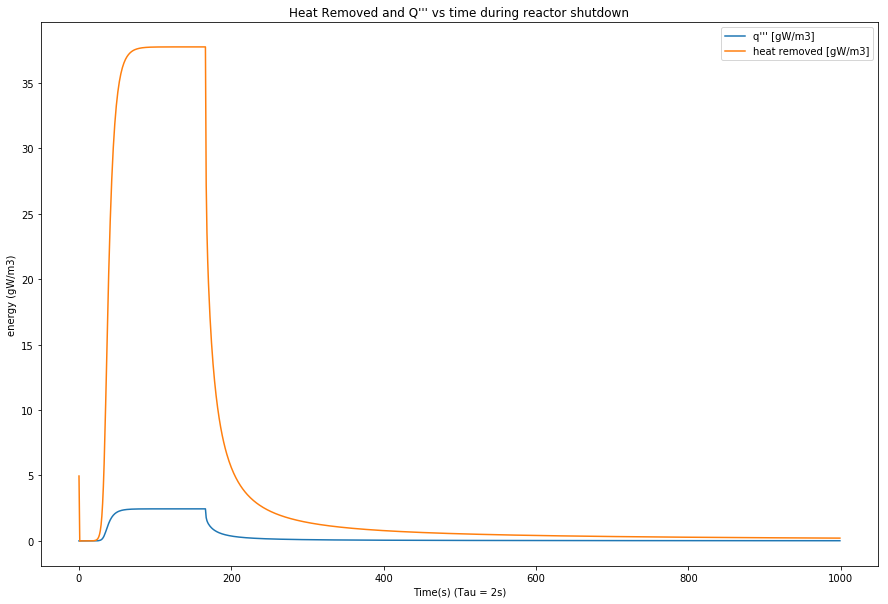

In [20]:
#plot the q3prime and heat removed data
heat_data3 = reactor.quantities1(reactor.u_vec_history, reactor.params, reactor.params['time_stamps'])
plot = heat_data3.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)
plot.set_xlabel("Time(s) (Tau = 2s)")
plot.set_ylabel("energy (gW/m3)")
plot.set_title("Heat Removed and Q''' vs time during reactor shutdown")

The reactor shuts down as would be expected, with Q''' and heat removed both going to zero after the reactor is shut down.

Text(0.5, 1.0, 'Turbine, Condenser and Net Power vs Time for shutdown')

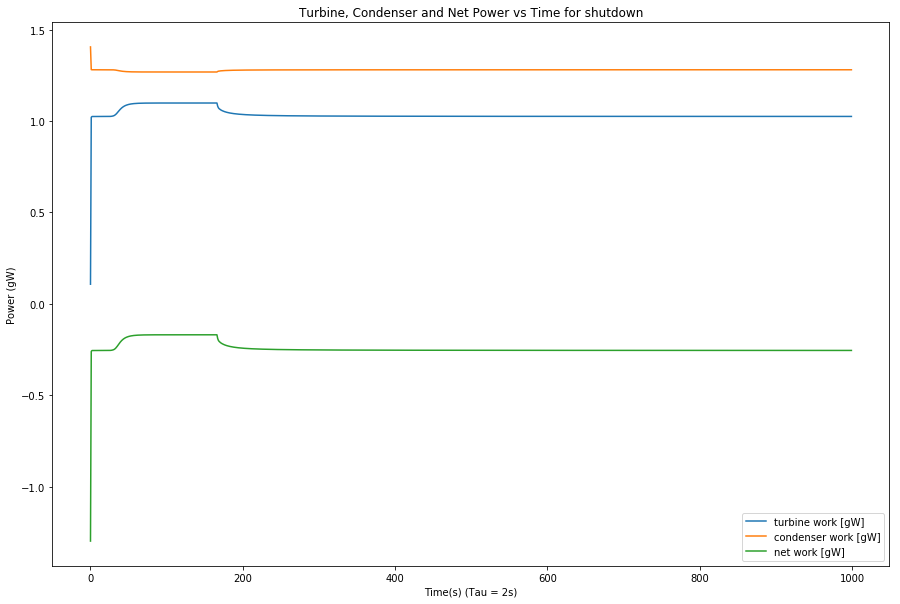

In [21]:
# plot the BOP work done
work_data3 = reactor.quantities2(reactor.u_vec_history, reactor.params, reactor.params['time_stamps'])
plot = work_data3.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)
plot.set_xlabel("Time(s) (Tau = 2s)")
plot.set_ylabel("Power (gW)")
plot.set_title("Turbine, Condenser and Net Power vs Time for shutdown")

Condenser and turbine work do not decrease to zero, but instead go to new lower steady state values as the ending temperature of the reactor is much higher than the beginning temperature of the reactor, meaning that steam is still flowing to the turbine and liquid must still be pumped to the reactor at relatively high operating pressures.

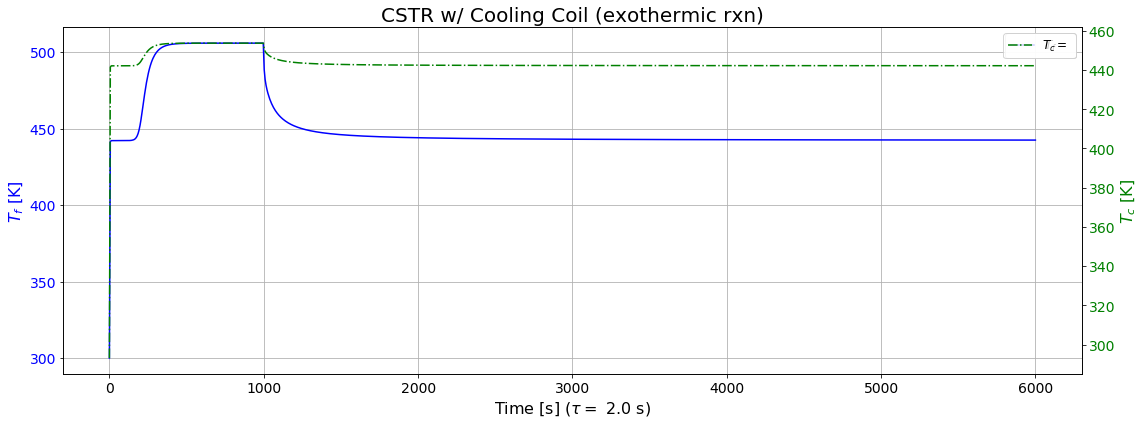

In [22]:
reactor.tmp()

The dual temperature asymtopes seen in reactor startup are also present during the startup in this case. After shut down, the reactor runs to new steady state values for temperature based on the heat removed by the turbine and condenser, at around 440 degrees kelvin for both the coolant and the fuel.

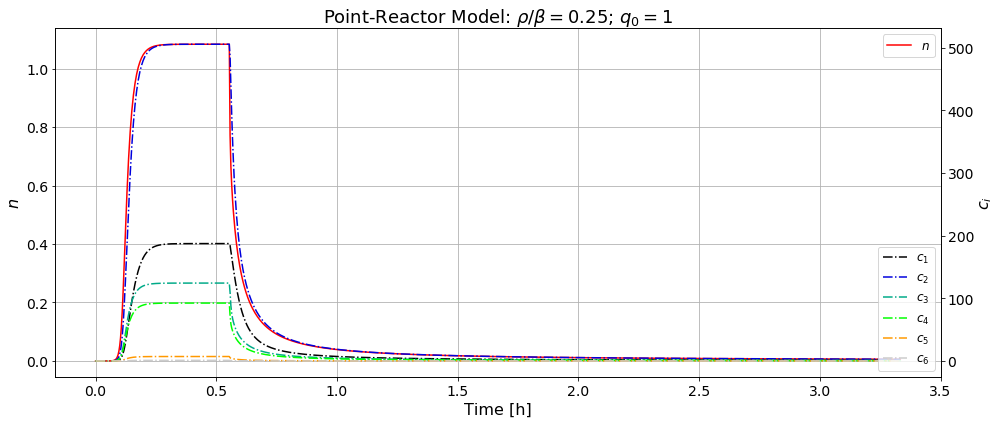

In [23]:
reactor.plot_results(reactor.u_vec_history, normalize=False)

Neutron and delayed emitter concentrations head to zero after shutdown as is expected.